# 4. Comparison of amino acid composition of species

In [67]:
import pandas as pd
import numpy as np

# load the data
# Load the CSV file
file_path = "amino_acid_percentage_data.csv"
df = pd.read_csv(file_path)

df.head()


,Sequence,Species,Protein_Length,A,C,D,E,F,G,H,...,M,N,P,Q,R,S,T,V,W,Y
0,MPTESGLQQRWRRGCAGGAGPQWWPPGRKPHGAGGTMPQPPTRDAP...,Cyanidioschyzon,191,13.089005,2.094241,3.141361,9.424084,2.094241,7.329843,1.047120,...,1.047120,2.094241,9.947644,5.235602,12.565445,9.424084,5.235602,3.664921,2.617801,0.523560
1,MATRHMLWMLGRYIRKVPLGRLGDSARARALSSSAARGHASSSHVA...,Cyanidioschyzon,128,12.500000,0.000000,3.125000,5.468750,2.343750,7.812500,7.812500,...,3.125000,1.562500,9.375000,0.781250,10.937500,8.593750,3.125000,3.906250,3.906250,3.125000
2,MTEASENIVVVPSEVQSSKLRACLSCGLVKSVAQFLAYGCENCPGL...,Cyanidioschyzon,118,9.322034,4.237288,3.389831,10.169492,4.237288,6.779661,0.000000,...,0.847458,1.694915,4.237288,2.542373,5.932203,8.474576,4.237288,11.016949,1.694915,2.542373
3,MPVSLKRLQARQERVASGLERKVTRVTSKGPKAKGVQSKNLNPYLV...,Cyanidioschyzon,75,8.000000,0.000000,0.000000,4.000000,5.333333,9.333333,1.333333,...,2.666667,2.666667,5.333333,5.333333,8.000000,6.666667,2.666667,10.666667,0.000000,2.666667
4,MPYYETLMLIDSRLGRGELHELLKRIVLRFMDAGGIVTRLRALPSA...,Cyanidioschyzon,200,10.500000,1.000000,2.500000,8.500000,4.000000,7.000000,2.500000,...,2.500000,0.500000,10.500000,3.500000,11.500000,4.500000,6.000000,5.500000,0.000000,2.500000


In [68]:
def calculate_species_aa_comp(df):
    # Group by Protein_Length and Species, then calculate the mean for each amino acid column
    grouped_df = df.groupby(['Species', 'Protein_Length']).mean(numeric_only=True)
    return grouped_df

species_aa_comp = calculate_species_aa_comp(df)

species_aa_comp.to_csv("species_amico_acid_percentage_data.csv")

species_aa_comp_v2 = species_aa_comp.reset_index()

species_aa_comp_v2.head()



,Species,Protein_Length,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
0,Arabidopsis_thaliana,50,5.241379,1.655172,4.620690,6.413793,5.448276,5.517241,2.827586,5.517241,...,4.344828,3.586207,4.000000,2.965517,6.620690,9.379310,4.689655,6.896552,2.068966,3.172414
1,Arabidopsis_thaliana,51,6.684492,2.228164,3.565062,3.921569,4.010695,5.258467,3.208556,5.704100,...,4.991087,2.852050,4.278075,3.386809,8.912656,6.862745,5.436720,6.595365,1.604278,2.317291
2,Arabidopsis_thaliana,52,4.598662,3.762542,2.591973,4.515050,4.515050,6.020067,2.173913,6.020067,...,4.013378,4.347826,4.347826,3.344482,5.769231,9.197324,6.020067,7.190635,1.003344,2.842809
3,Arabidopsis_thaliana,53,5.831904,2.144082,3.173242,5.403087,4.888508,5.317324,2.915952,6.346484,...,4.545455,4.030875,3.602058,2.658662,6.346484,8.404803,5.317324,4.888508,1.457976,3.087479
4,Arabidopsis_thaliana,54,5.144033,2.194787,4.115226,5.144033,5.212620,5.829904,2.263374,6.584362,...,3.978052,3.772291,3.429355,2.743484,6.584362,7.475995,5.692730,7.133059,2.057613,3.566529


In [69]:
# melt data set
species_aa_comp_melted = species_aa_comp_v2.melt(
    id_vars=['Protein_Length', 'Species'], 
    var_name='Amino_Acid', 
    value_name='Percentage')

species_aa_comp_melted.head()

,Protein_Length,Species,Amino_Acid,Percentage
0,50,Arabidopsis_thaliana,A,5.241379
1,51,Arabidopsis_thaliana,A,6.684492
2,52,Arabidopsis_thaliana,A,4.598662
3,53,Arabidopsis_thaliana,A,5.831904
4,54,Arabidopsis_thaliana,A,5.144033


# 4.1 Comparison of the amino acid composition at representative gene lengths of each species

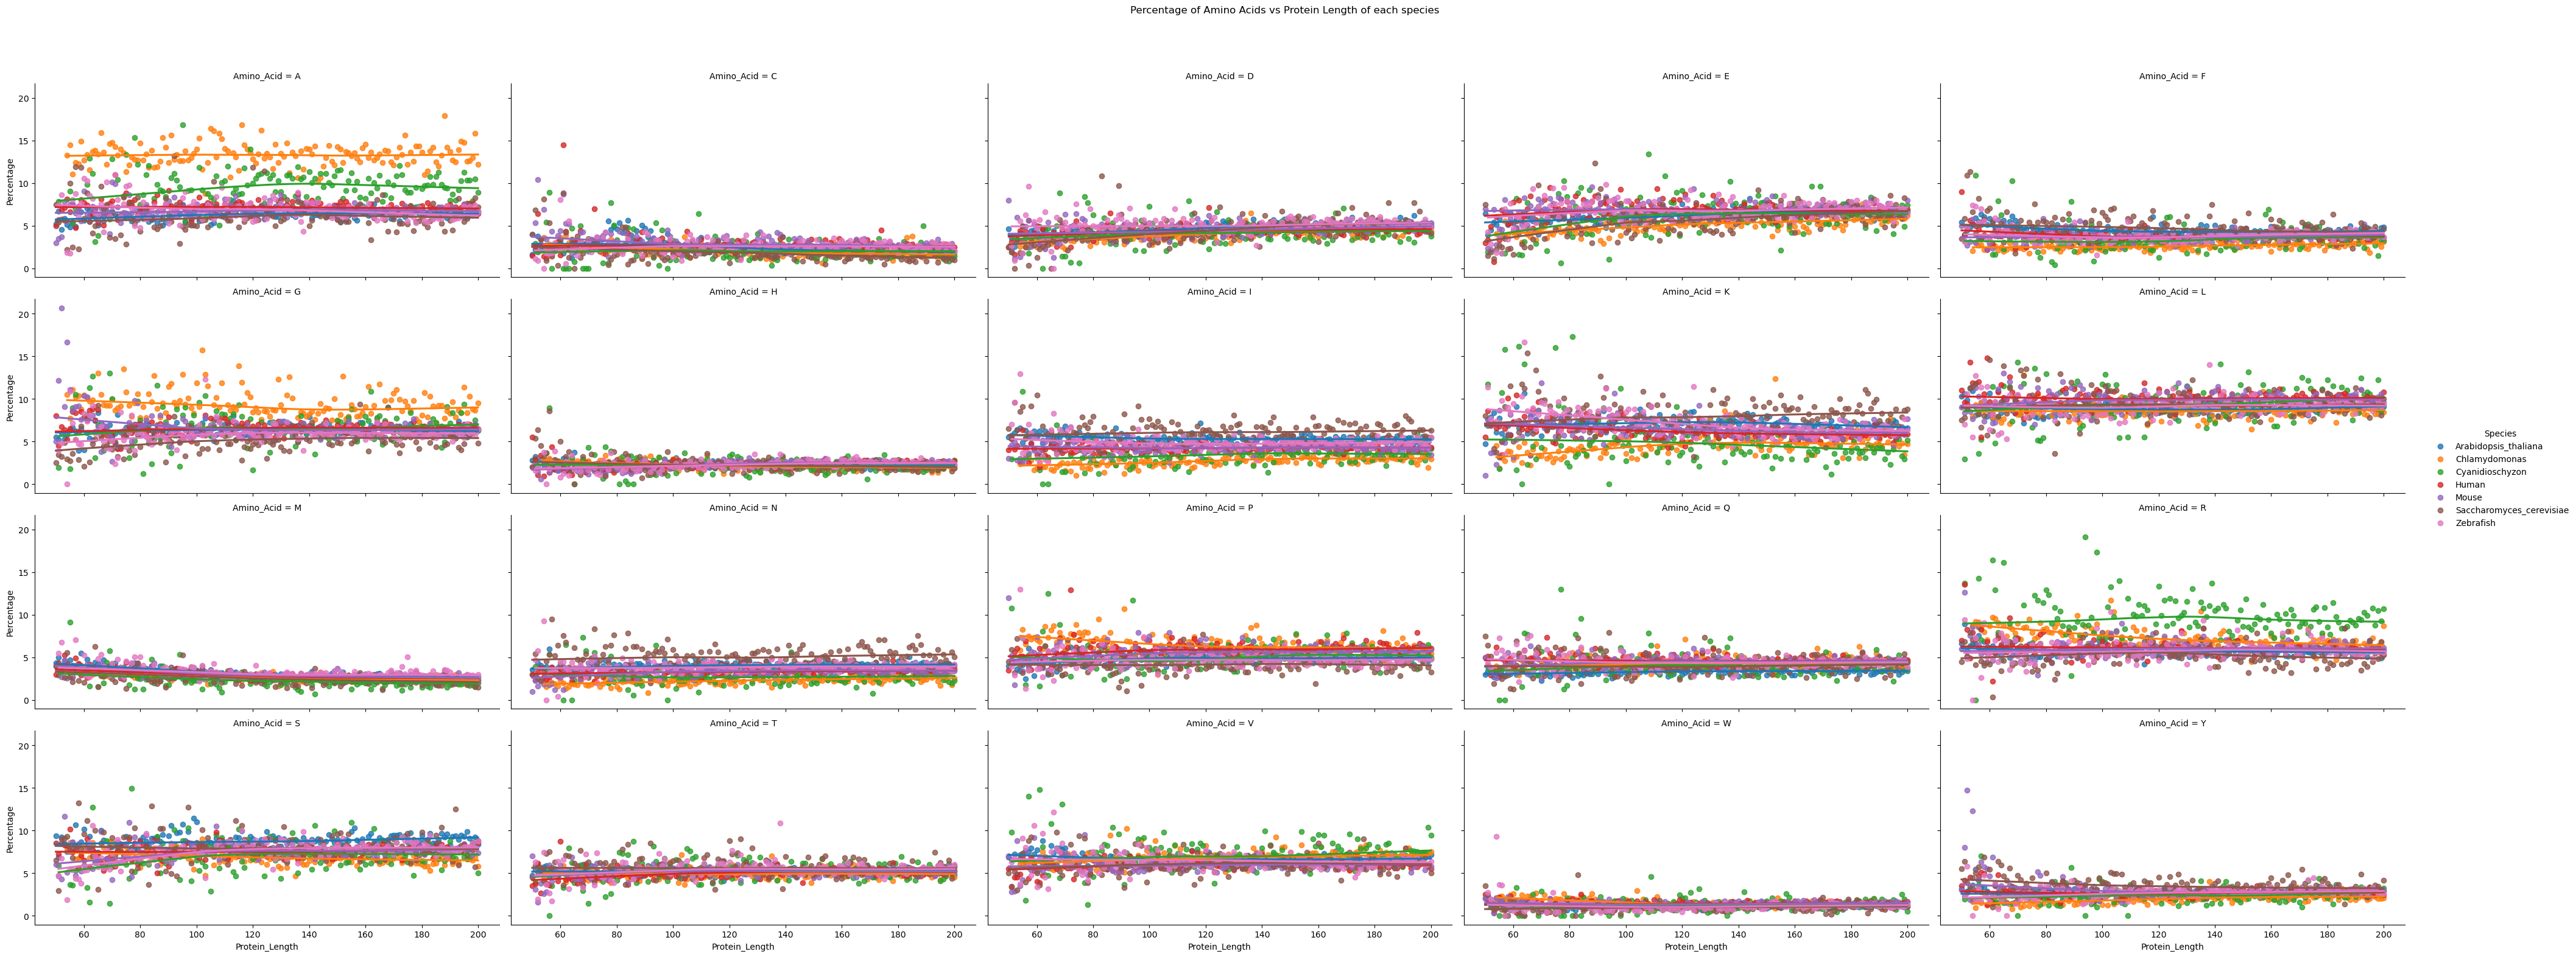

In [70]:
# amino acid composition at representative gene length, comparison between species
import matplotlib.pyplot as plt
import seaborn as sns

# Create the lmplot
g = sns.lmplot(
    data=species_aa_comp_melted,
    x='Protein_Length',
    y='Percentage',
    hue='Species',
    col='Amino_Acid',
    col_wrap=5,
    lowess=True,
    fit_reg=True,
    height=4,  # Size of each facet
    aspect=2  # Aspect ratio
)

# Adjust the layout for better spacing
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Percentage of Amino Acids vs Protein Length of each species')

plt.show()

# 4.2 Heat map

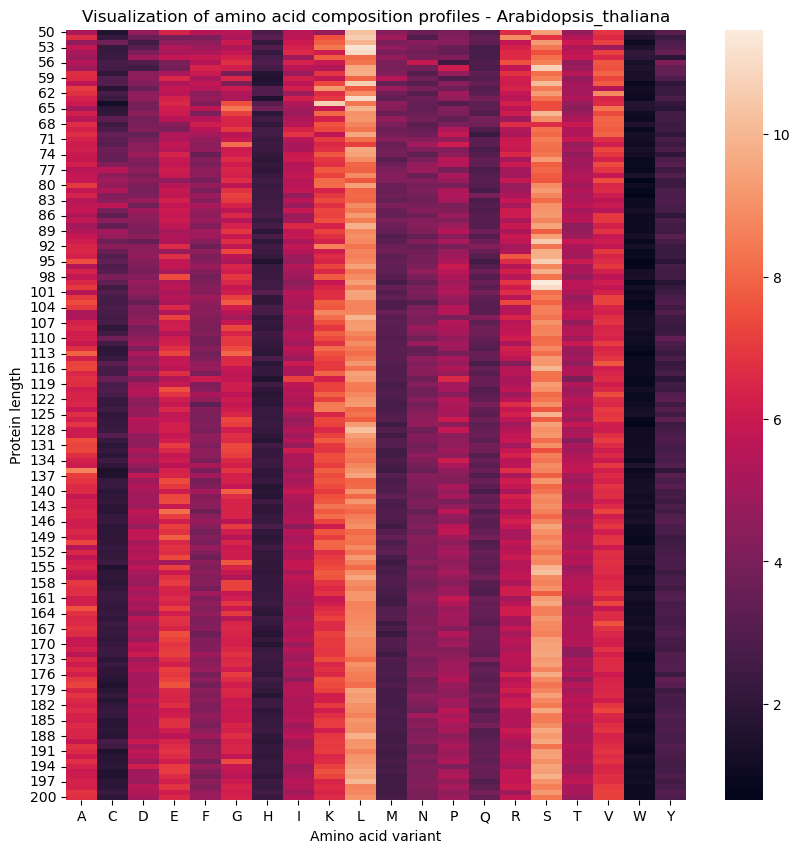

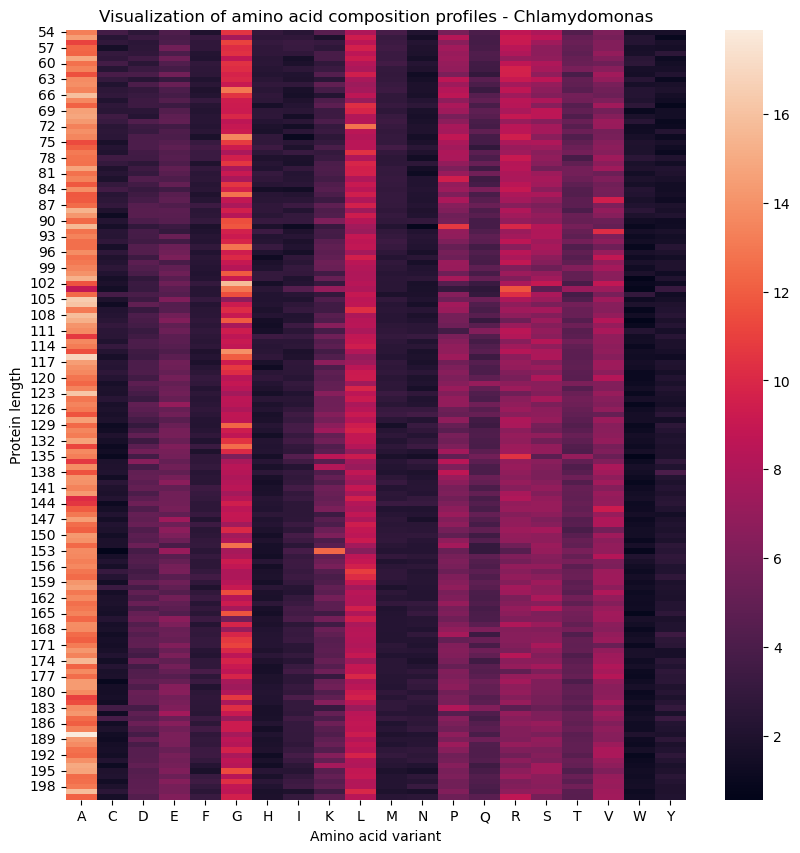

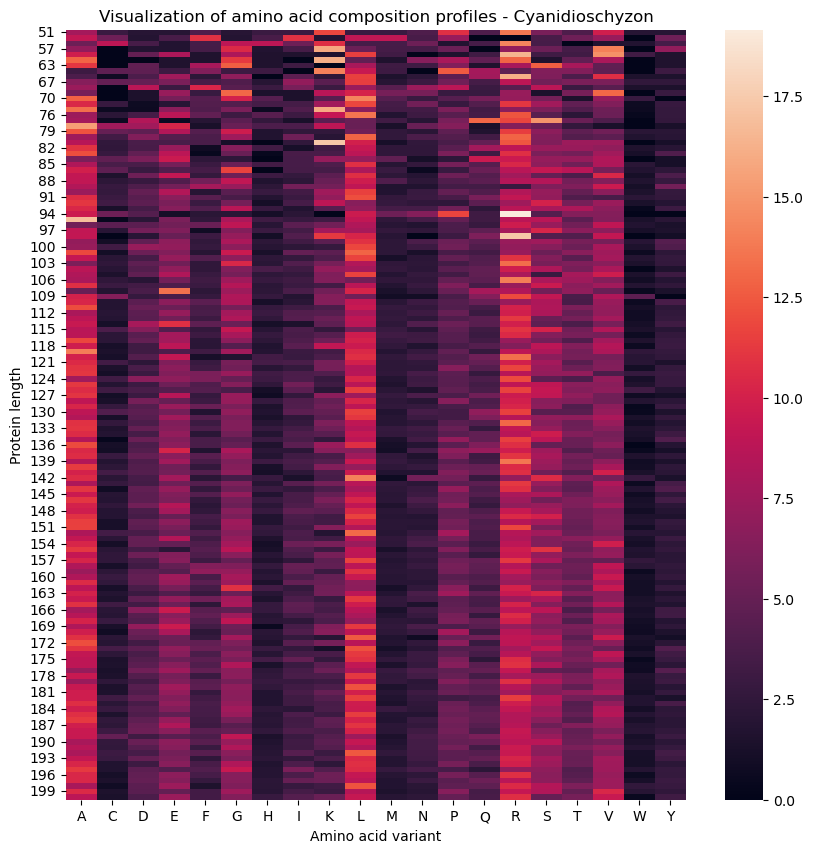

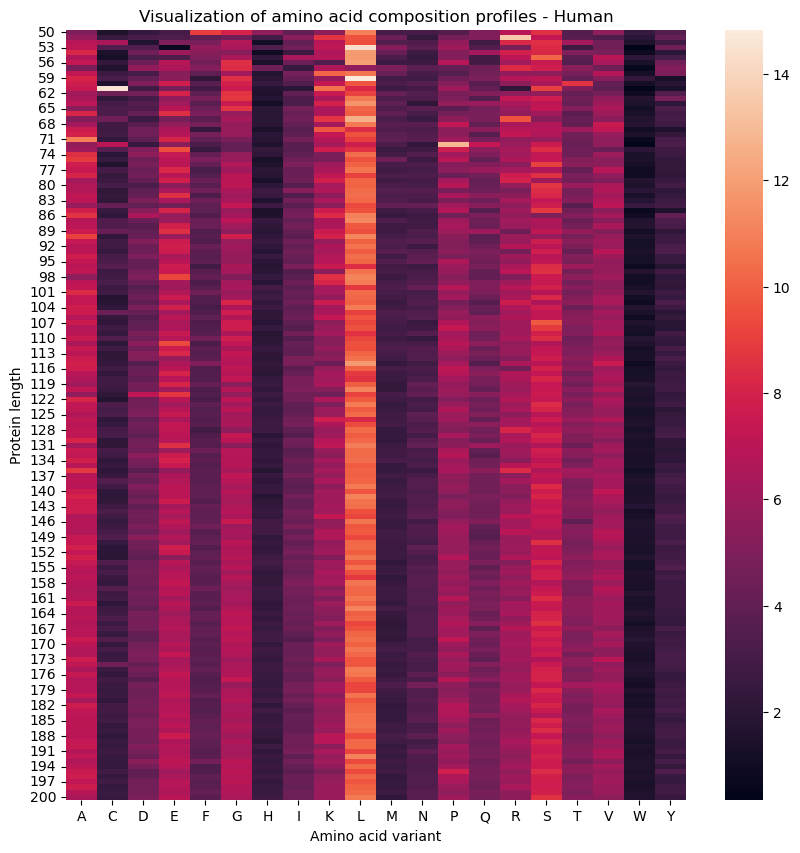

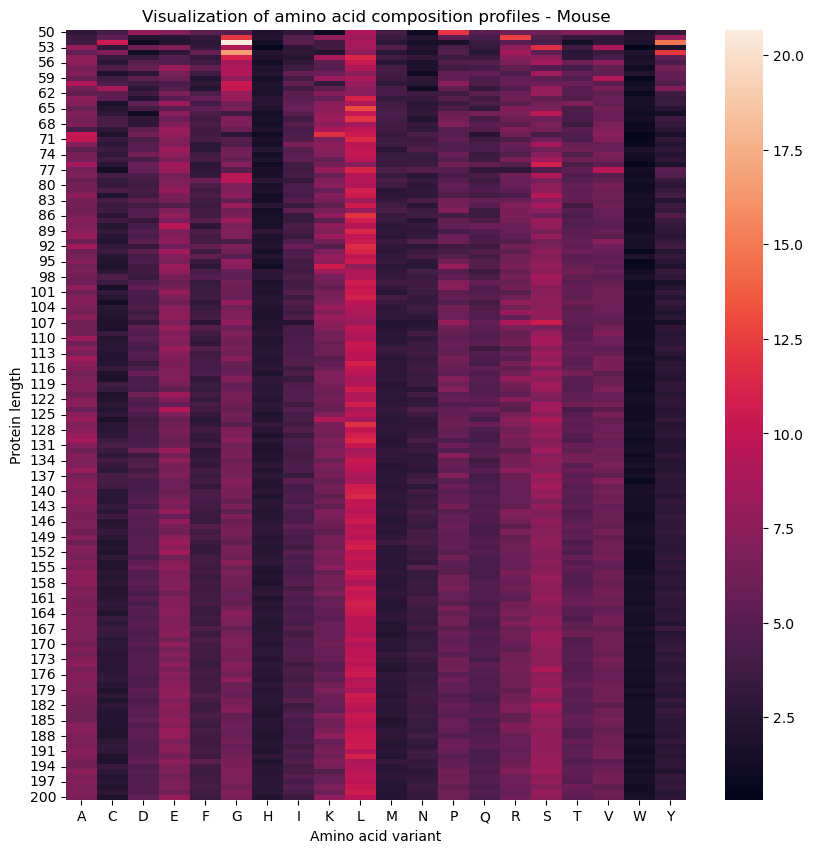

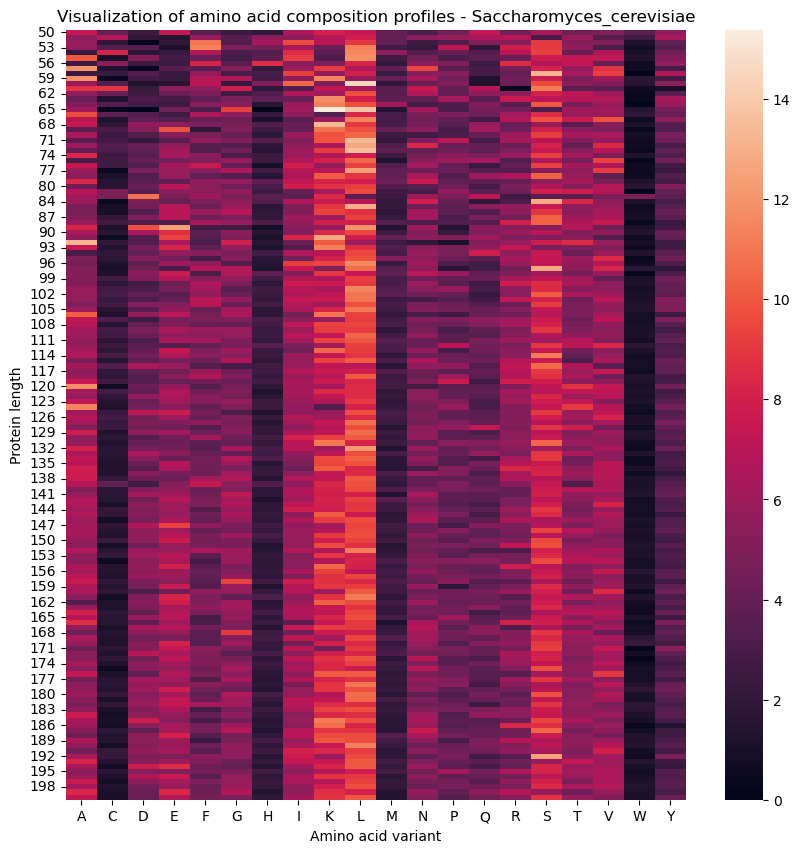

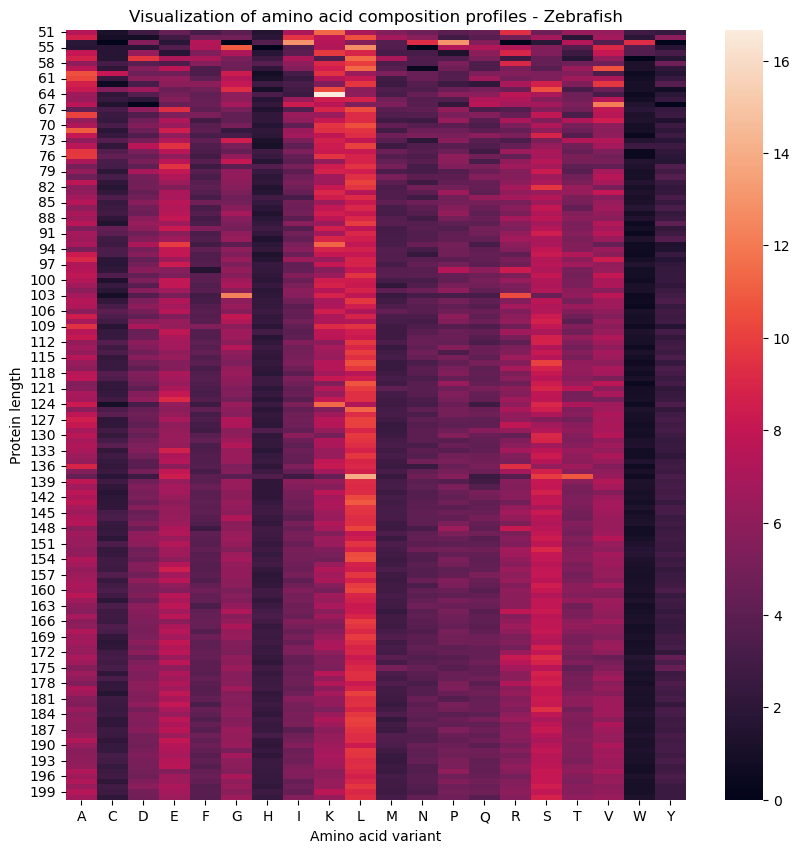

In [130]:
species_aa_comp_forheatmap = species_aa_comp_v2.set_index('Protein_Length')

species_list = species_aa_comp_forheatmap['Species'].unique()

species_dfs = {}

for species in species_list: # create data frames from each 7 species
    globals()[f"{species}_df"] = species_aa_comp_forheatmap[species_aa_comp_forheatmap['Species'] == species]
    globals()[f"{species}_df"] = globals()[f"{species}_df"].drop(columns='Species')

    plt.figure(figsize=(10,10))

    sns.heatmap(data=globals()[f"{species}_df"])

    plt.title(f"Visualization of amino acid composition profiles - {species}")
    plt.ylabel("Protein length")
    plt.xlabel("Amino acid variant")
    plt.show()

# 4.3 Hierarchial clustering

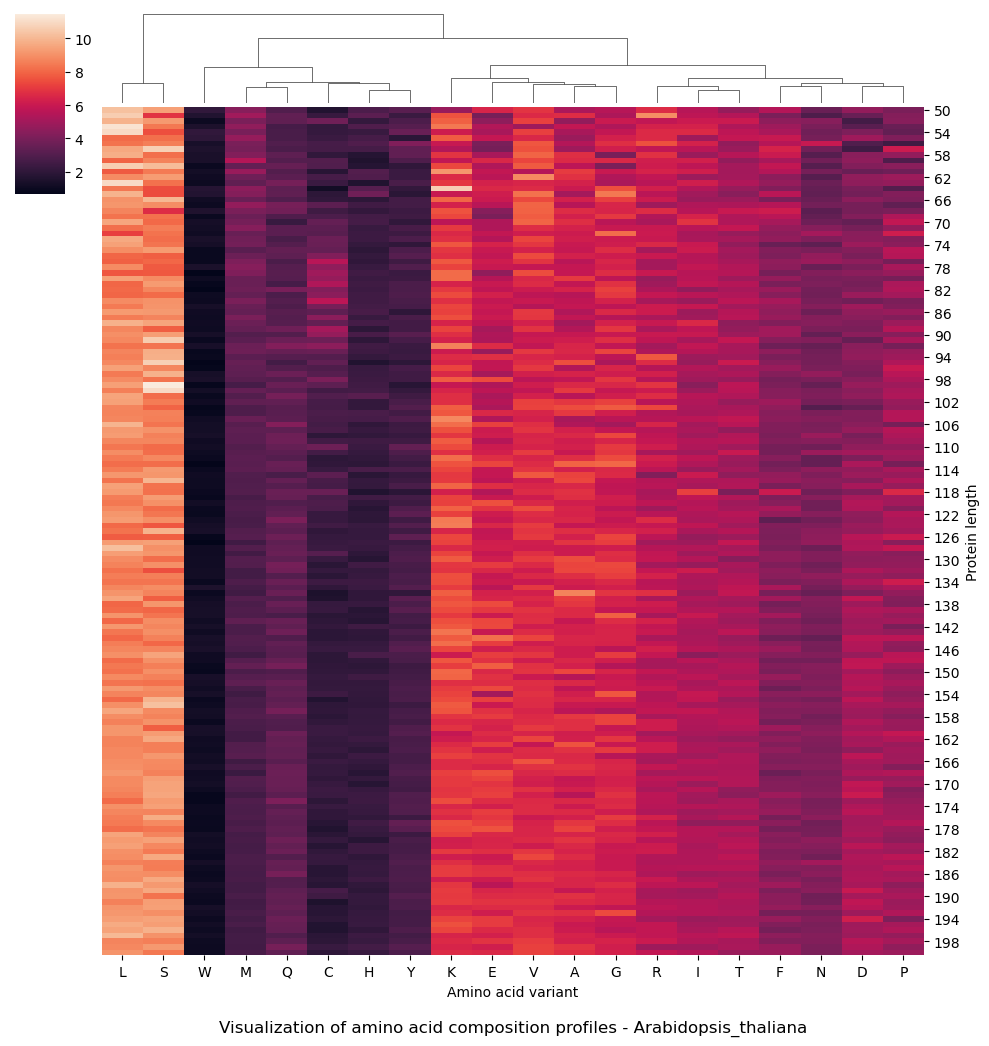

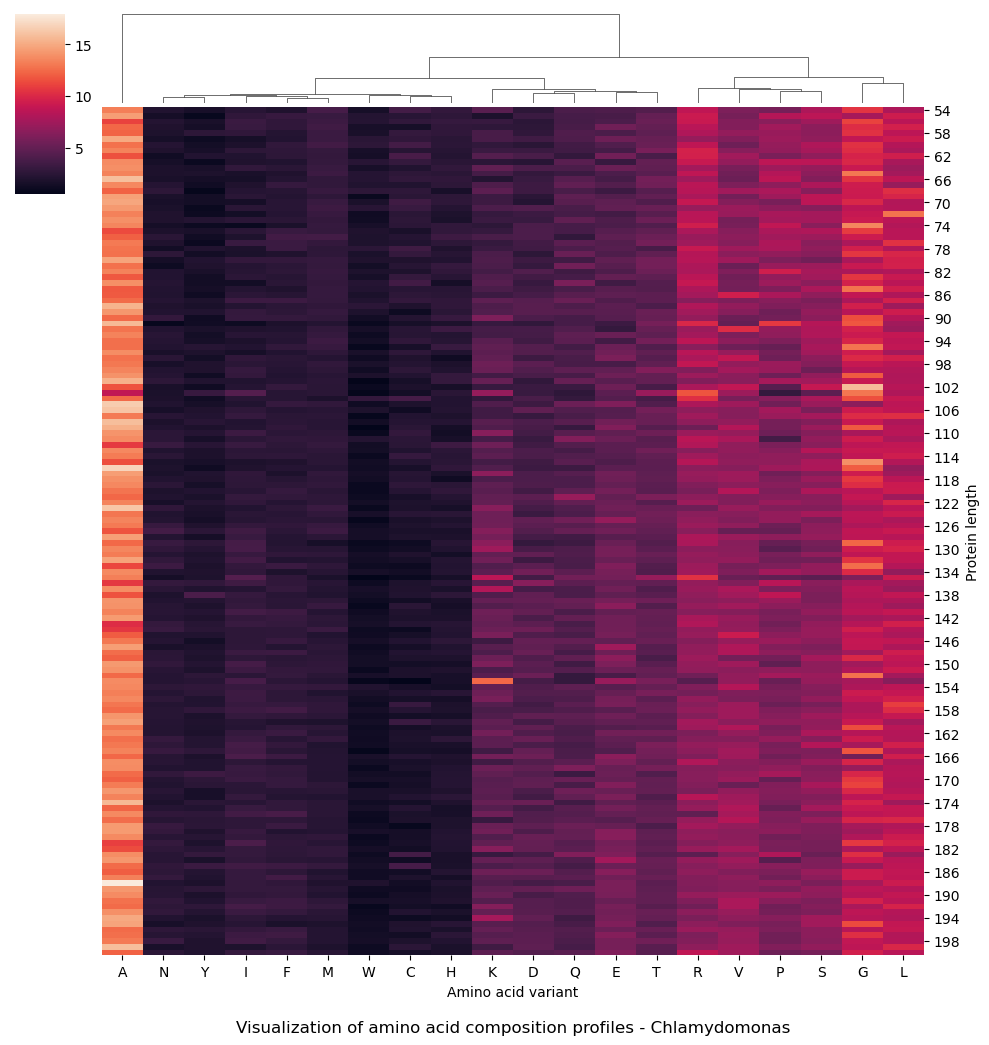

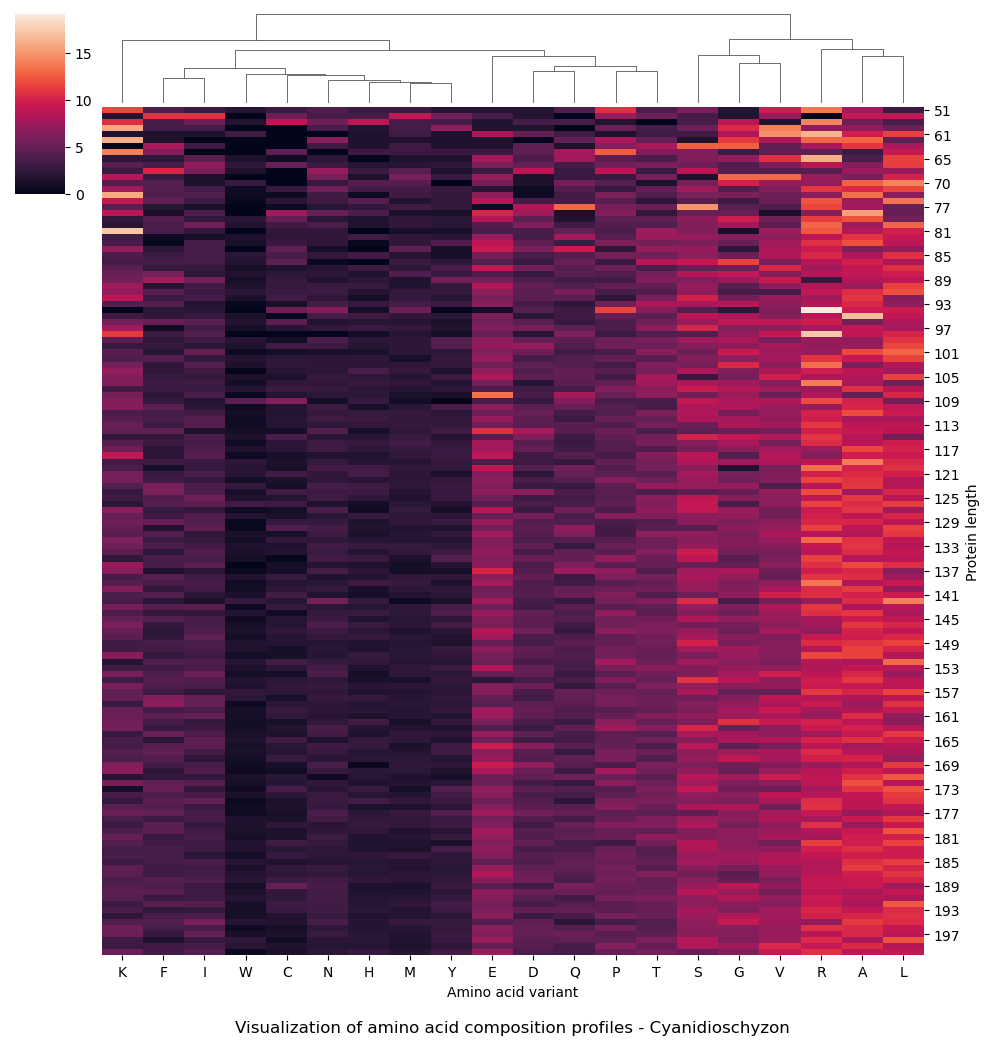

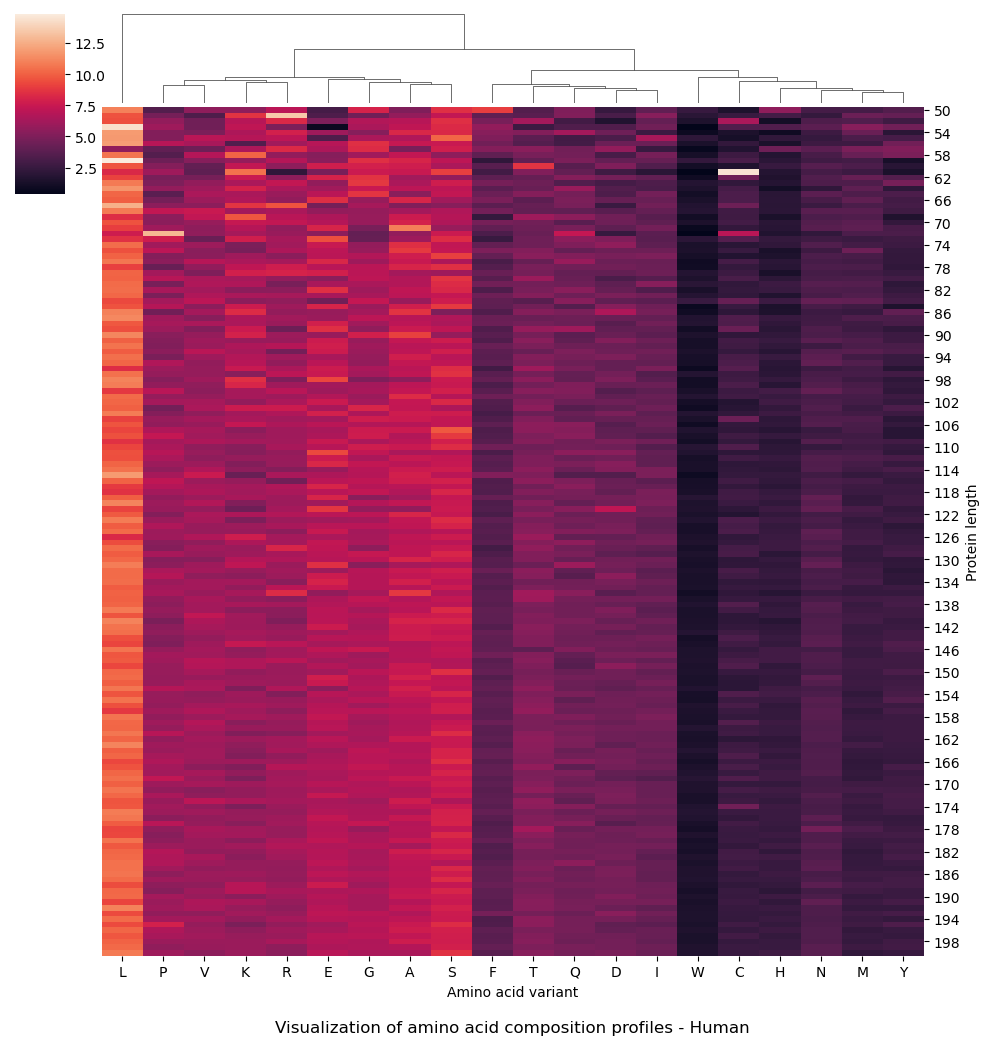

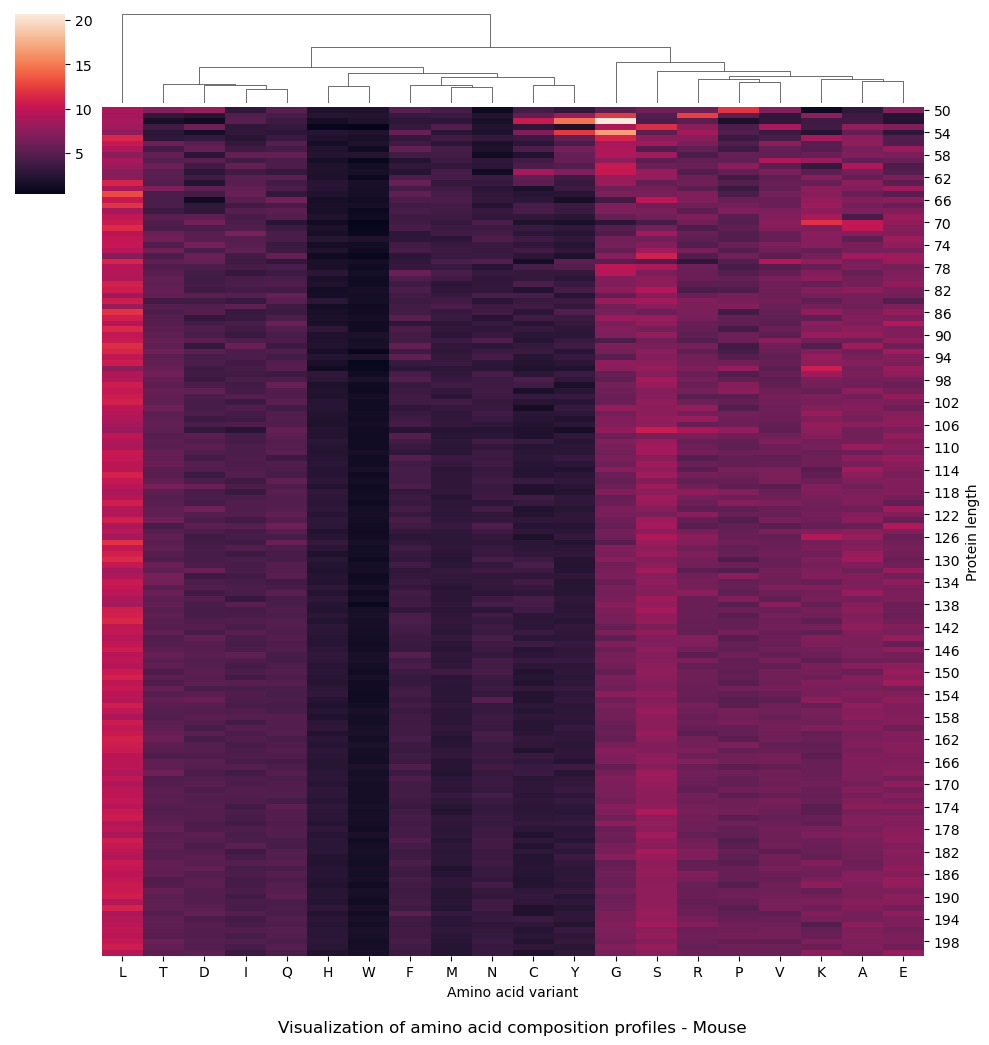

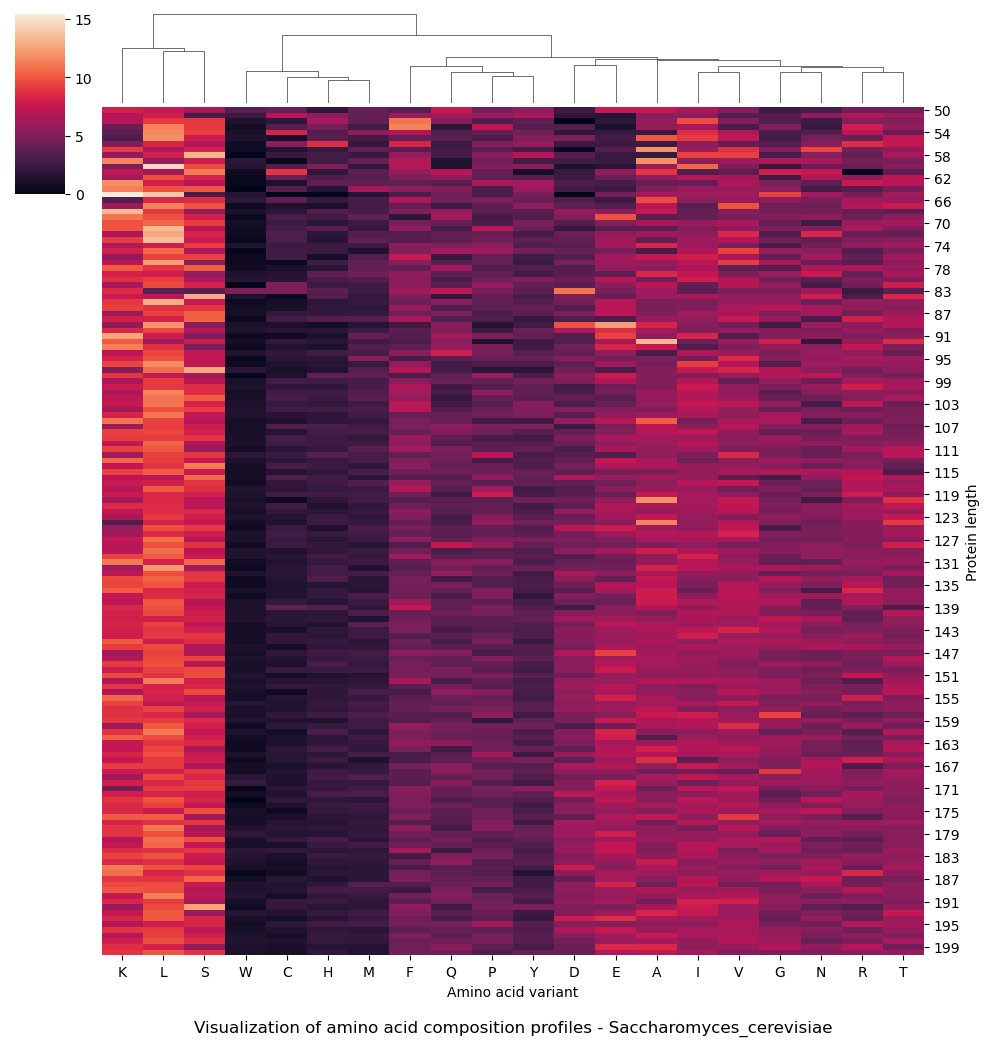

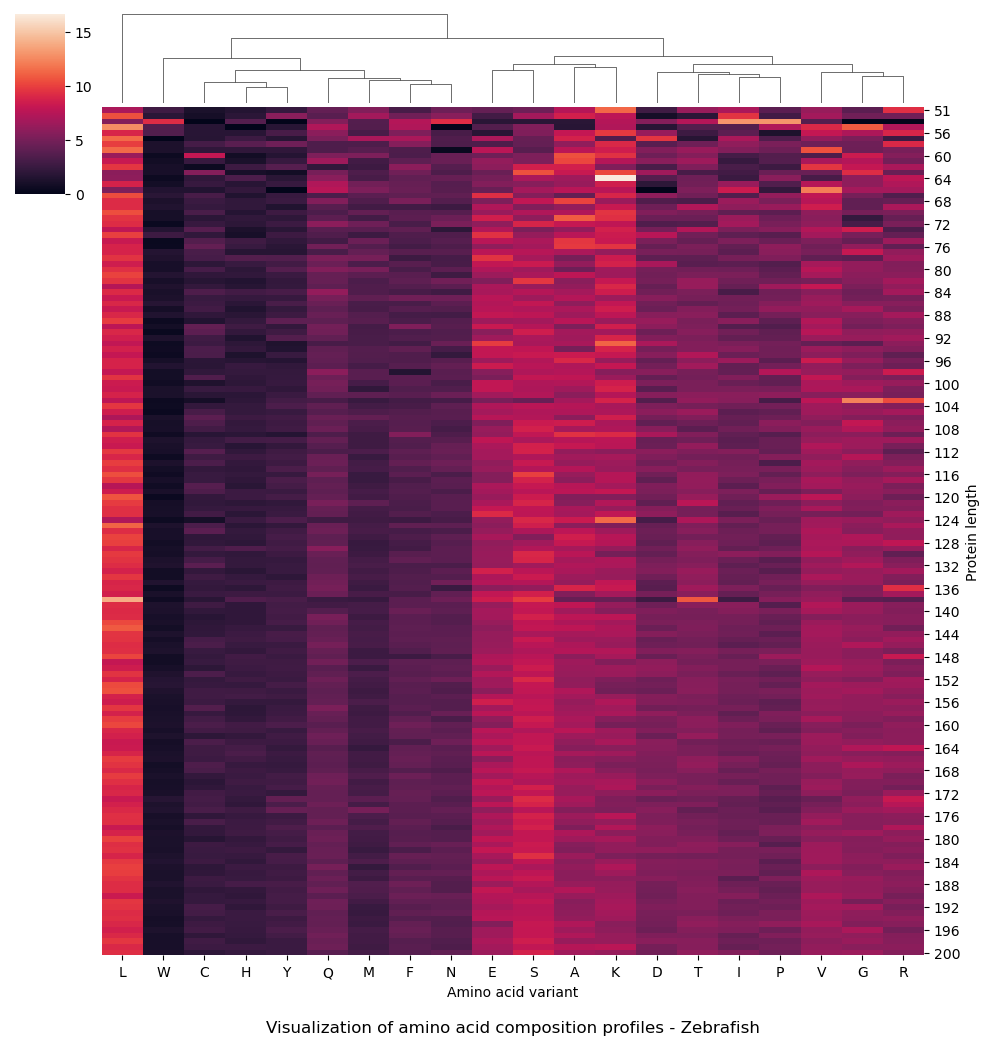

In [128]:
species_aa_comp_forheatmap = species_aa_comp_v2.set_index('Protein_Length')

species_list = species_aa_comp_forheatmap['Species'].unique()

species_dfs = {}

for species in species_list:
    clustermap = sns.clustermap(
    data=globals()[f"{species}_df"],
    row_cluster=False,
    figsize=(10,10),
    dendrogram_ratio=(0.1, 0.1)
    )

    clustermap.ax_heatmap.set_xlabel("Amino acid variant")
    clustermap.ax_heatmap.set_ylabel("Protein length")
    clustermap.ax_heatmap.set_title(f"Visualization of amino acid composition profiles - {species}", y=-0.1)

# 4.4 Principal component analysis

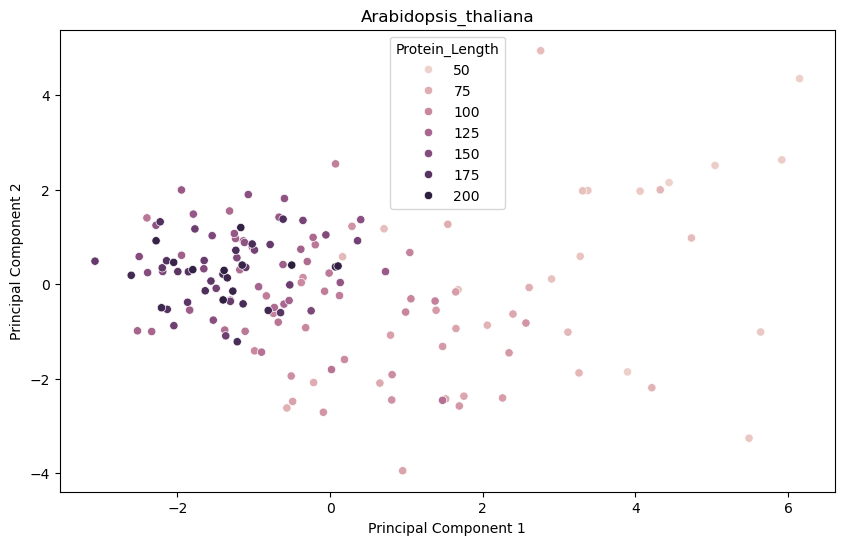

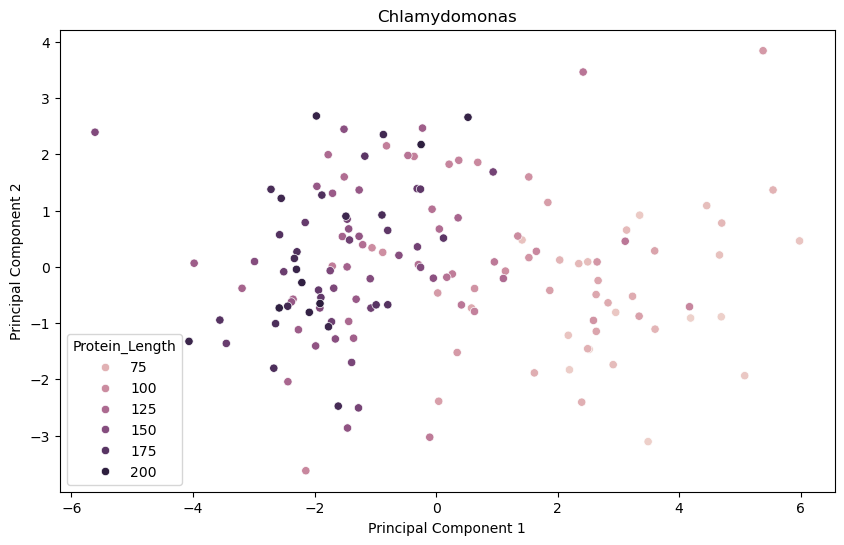

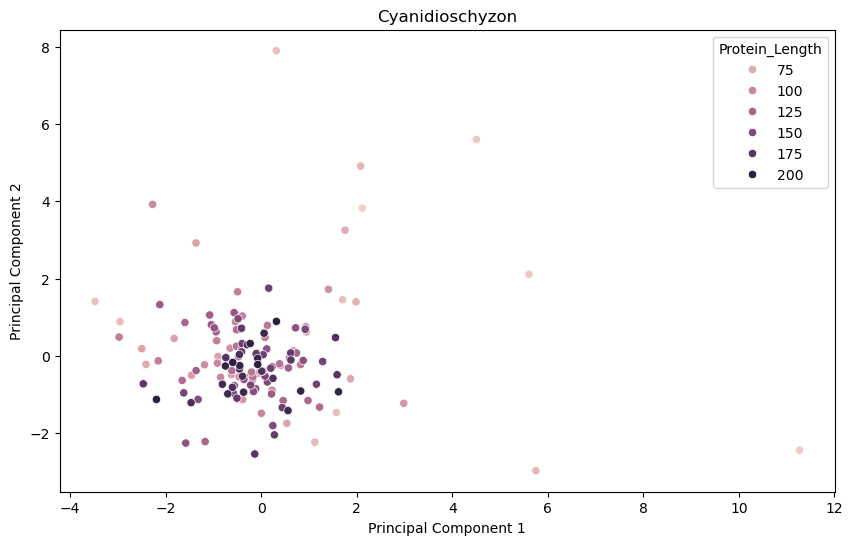

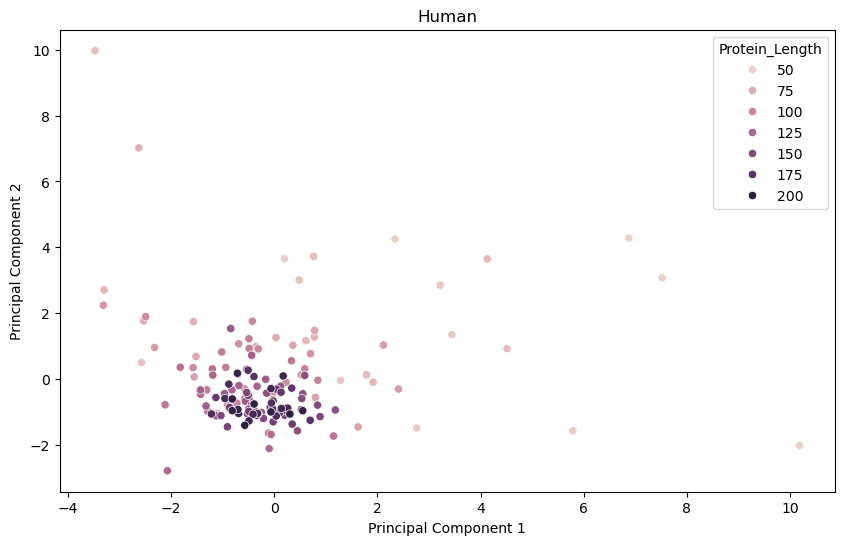

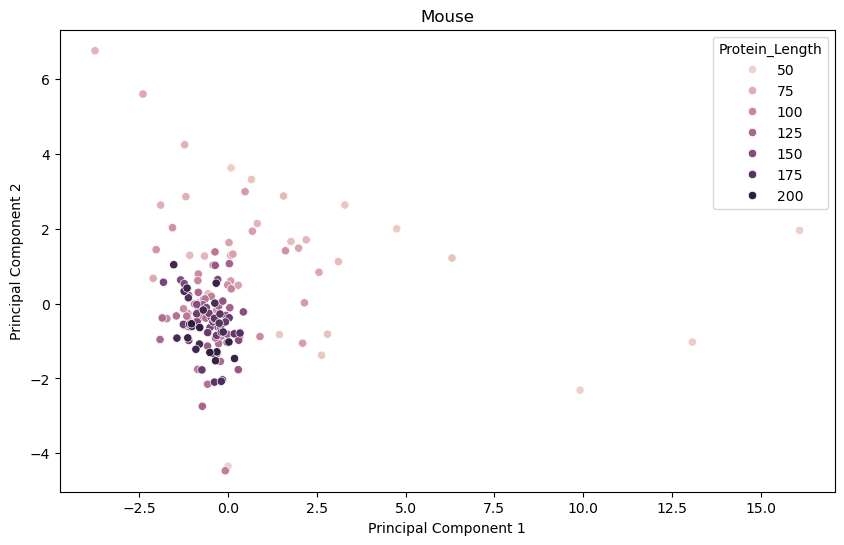

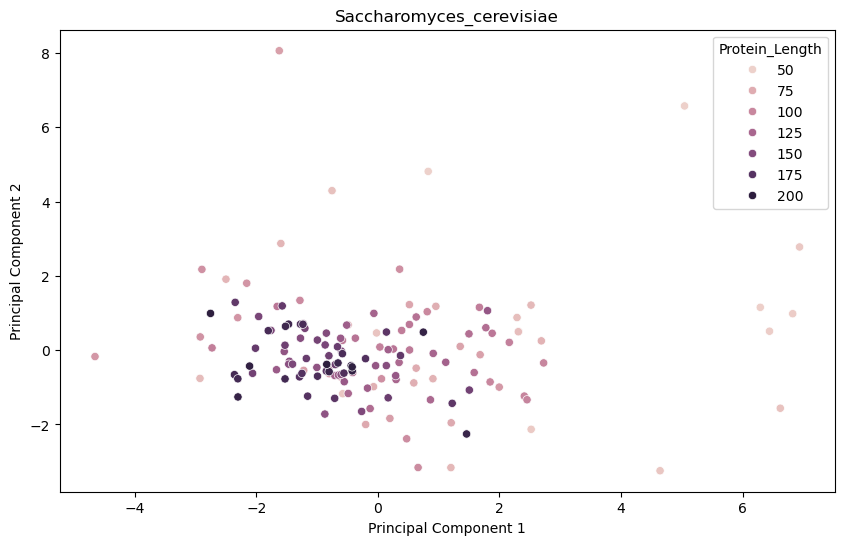

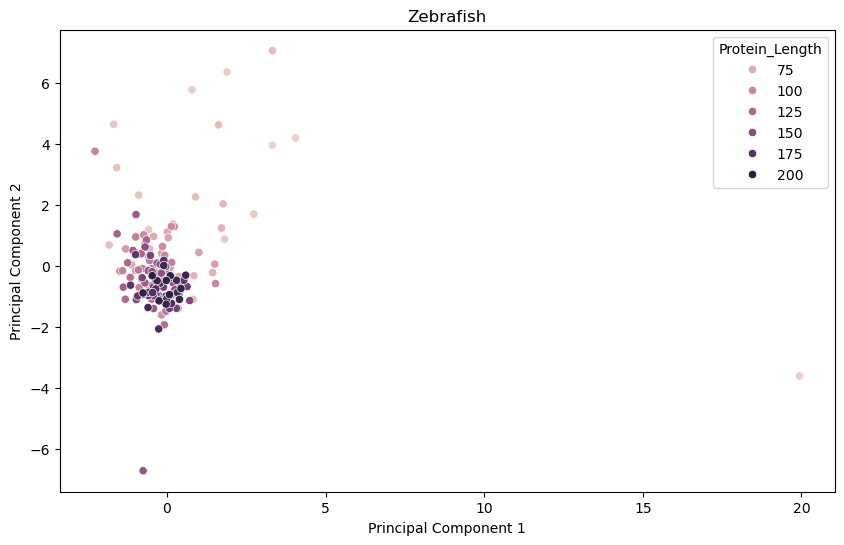

In [133]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

for species in species_list:
    data = globals()[f"{species}_df"]
    data = data.reset_index()

    # standardize the data
    features = data.drop("Protein_Length", axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_features)

    # create data frame with PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
    pca_df["Protein_Length"] = data["Protein_Length"]

    # plot the PCA results
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Protein_Length")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"{species}")
    plt.show()